In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [2]:
len(perch_length)

56

In [3]:
np.corrcoef(perch_length, perch_weight)

array([[1.        , 0.95865587],
       [0.95865587, 1.        ]])

In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print(knr.predict([[50]]))

[1033.33333333]


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(train_input, train_target)

LinearRegression()

In [11]:
lr.coef_

array([39.01714496])

In [12]:
lr.intercept_

-709.0186449535474

In [13]:
import matplotlib.pyplot as plt

In [14]:
# y_hat = lr.coef_ * x + lr.intercept_

In [15]:
lr.coef_ * 50 + lr.intercept_

array([1241.83860323])

In [16]:
lr.score(train_input, train_target)

0.9398463339976041

In [17]:
lr.score(test_input, test_target)

0.824750312331356

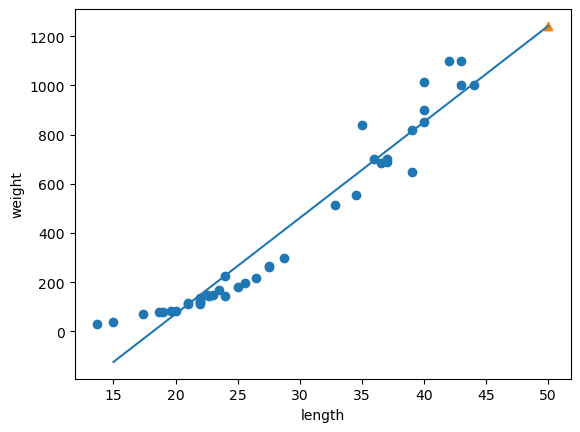

In [18]:
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 다항 회귀

In [19]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [22]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [21]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [24]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
# 단순선형(직선)
# 훈련데이터 모델 평가     테스트 모델 평가
# 0.9398463339976041     0.824750312331356

In [28]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [ ]:
# y_hat = 1.01433211 * x^2 + (-21.55792498 * x) + 116.0502107827827

In [25]:
lr.score(train_poly, train_target)

0.9706807451768623

In [26]:
lr.score(test_poly, test_target)

0.9775935108325122

In [27]:
# 단순모델보다는 다항이 더 좋아짐, 하지만 과적합이 남아 있을 경우
# 규제를 하는 방법을 사용함(라쏘 회귀(L1), 릿지 회귀(L2))

In [30]:
import matplotlib.pyplot as plt

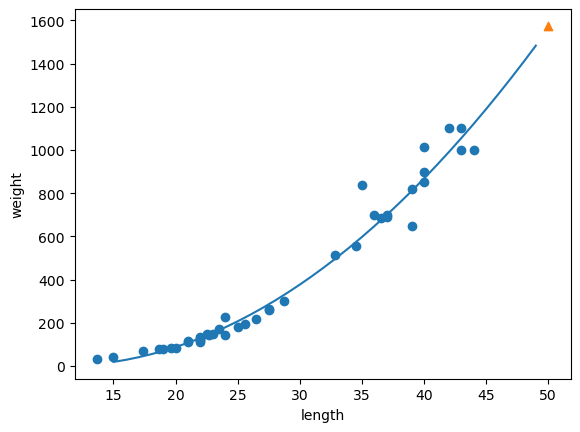

In [31]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
# 다항 특성 만들기

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# feature engineering : 기존의 특성을 가지고 새로운 특성을 만들어냄

In [34]:
poly = PolynomialFeatures()

In [35]:
poly.fit([[2, 3]])

PolynomialFeatures()

In [37]:
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

### 다중회귀

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [42]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [43]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [60]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(42, 3)
(42,)
(14, 3)
(14,)


In [44]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [50]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [51]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [52]:
len(poly.get_feature_names_out())

5

In [57]:
poly_nominal_re = PolynomialFeatures(include_bias=False)
poly_nominal_re.fit([[2, 3, 5]])
print(poly_nominal_re.transform([[2, 3, 5]]))
poly_nominal_re.get_feature_names_out()

[[ 2.  3.  5.  4.  6. 10.  9. 15. 25.]]


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [58]:
len(poly_nominal_re.get_feature_names_out())

9

In [59]:
poly_nominal_re2 = PolynomialFeatures(include_bias=True)
poly_nominal_re2.fit([[2, 3, 5]])
print(poly_nominal_re2.transform([[2, 3, 5]]))
poly_nominal_re2.get_feature_names_out()
len(poly_nominal_re2.get_feature_names_out())

[[ 1.  2.  3.  5.  4.  6. 10.  9. 15. 25.]]


10

In [61]:
poly_nominal2 = PolynomialFeatures(include_bias=False)
poly_nominal2.fit(train_input)
train_poly = poly_nominal2.transform(train_input)

In [63]:
poly_nominal2.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [64]:
len(poly_nominal2.get_feature_names_out())

9

In [65]:
train_poly

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

### 다중회귀 모델 훈련하기

In [68]:
# 훈련 세트에 대한 평가

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982123


In [69]:
# 테스트 세트에 대한 평가

In [70]:
poly_nominal2.fit(test_input)
test_poly = poly_nominal2.transform(test_input)

In [71]:
print(lr.score(test_poly, test_target))

0.971455991159413


In [72]:
# 정규화(표준화-평균0,표준편차1,분산1)

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc = StandardScaler()

In [79]:
train_poly[:,0]

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [77]:
train_poly[:,0].mean()

28.445238095238096

In [78]:
train_poly[:,0] - train_poly[:,0].mean()

array([ -8.8452381,  -6.4452381,  -9.7452381, -11.0452381,   7.5547619,
        -3.4452381,  11.5547619,  10.5547619,  14.5547619,  -6.4452381,
        -8.4452381,  -6.4452381,  -4.4452381,  -0.9452381,  14.5547619,
        11.5547619,  -4.4452381,  -7.4452381,  -0.9452381,  11.5547619,
         4.3547619,  -1.9452381,   8.0547619, -14.7452381,  -5.7452381,
       -13.4452381,   8.5547619,   6.5547619,   0.2547619,  -4.9452381,
        10.5547619,  -7.4452381,  -5.4452381,  -6.4452381,  15.5547619,
        -5.9452381,  -9.4452381,   8.5547619,  -6.4452381,  -2.8452381,
        13.5547619,   6.0547619])

In [81]:
train_poly[:,0].std()

8.728311961955496

In [82]:
(19.6 - 28.445238095238096) / 8.728311961955496

-1.0133961909006288

In [ ]:
# 반드시 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야함

In [83]:
sc.fit(train_poly)
train_scaled = sc.transform(train_poly)
test_scaled = sc.transform(test_poly)

In [89]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
        -0.95745849, -0.93942079, -0.94342509, -0.94100107],
       [-0.73842893, -0.75254307, -0.74466913, -0.76472563, -0.7717585 ,
        -0.77238267, -0.7747325 , -0.77298293, -0.76716811],
       [-1.11650891, -0.98919391, -0.97371419, -1.02065999, -0.9714645 ,
        -0.97031097, -0.92689165, -0.92331614, -0.91379551],
       [-1.26544951, -1.20148364, -1.07678447, -1.11008743, -1.0794873 ,
        -1.04481394, -1.04749571, -1.01503633, -0.97401432],
       [ 0.86554673,  0.89357239,  1.09914363,  0.78258063,  0.79878122,
         0.93990033,  0.80045116,  0.93459078,  1.05668676],
       [-0.39471986, -0.55765413, -0.65305111, -0.49604314, -0.5750369 ,
        -0.62146959, -0.63540138, -0.67211558, -0.70357069],
       [ 1.3238255 ,  1.35295344,  1.31101032,  1.3618677 ,  1.39093563,
         1.37273894,  1.40131663,  1.38189727,  1.33959041],
       [ 1.2092558 ,  1.52696142,  1.44843736,  1.21132928,  1

In [84]:
# 기준 0.971455991159413

In [85]:
# 릿지(L2) : 계수를 제곱한 값을 기준으로 적용

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9857915060511934


In [88]:
print(ridge.score(test_scaled, test_target))

0.9835057194929057


In [90]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [91]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [92]:
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

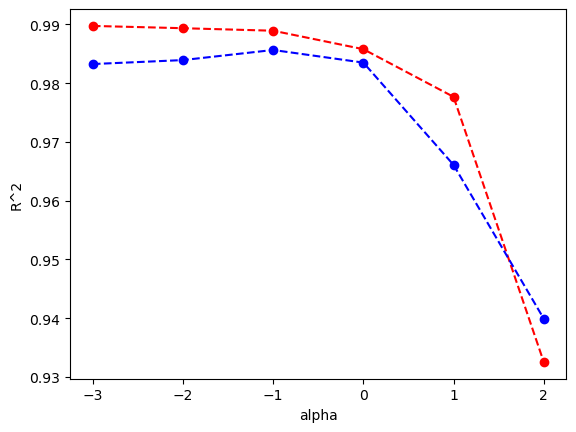

In [96]:
plt.plot(np.log10(alpha_list), train_score, "o--r")
plt.plot(np.log10(alpha_list), test_score, "o--b")
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [98]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9889354346720892
0.9856564835209132


## 랏쏘

In [99]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.986591255464559


In [100]:
print(lasso.score(test_scaled, test_target))

0.9846056618190413


In [101]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\ProgramData\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.739e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


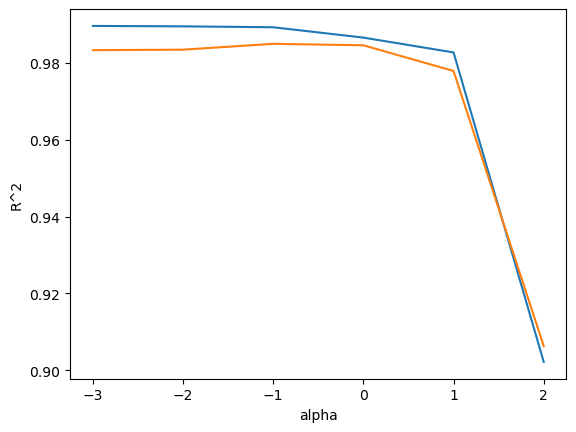

In [103]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()